#### OS Map and Hack 2021 Tech Webinar - OS Rapid Prototyping Team   
# Using OS Roads as a Graph Network in Python 
<br>  
By leveraging powerful network analytics, OS data can be used to support local communities, environmental initiatives, innovative technologies, and many other beneficial causes. 

In this Python-based workshop, OS’s Rapid Prototyping Team will demonstrate some worked examples to show you how to use the NetworkX library to apply cutting edge algorithms to MasterMap® Highways. 

By the end of the webinar, you will have gained a practical understanding of how to access OS data and be able to start using these tools in your own work.

## Outline

- Benefits of treating roads as a graph 
	
- Using the OS Data Hub to access road data
	
- Converting geospatial data to a graph
	
- Applying graph algorithms
	
- Plotting graphs
	
- Example of using graphs in practise

- Augmenting the graph with other data

## Benefits of treating roads as a graph

## Using the OS Data Hub to access road data

This section requests data from [OS Highways](https://www.ordnancesurvey.co.uk/business-government/products/mastermap-highways), but works in the same way for any of the data available from the [OS Features API](https://osdatahub.os.uk/docs/wfs/technicalSpecification).

To run this section you'll need:
- an API key from the [OS Data Hub](https://osdatahub.os.uk/) 
- the OS API python wrapper [OS-PAW](https://pypi.org/project/os-paw/).

Install OS-PAW using pip:
```
pip install os-paw
```

In [7]:
from os_paw.wfs_api import WFS_API
import os

# Find your key in your API Dashboard here:
# https://osdatahub.os.uk/dashboard
API_KEY = os.environ.get("OS_API_KEY")

# Use the API key to set up an instance of the WFS_API class
wfs_api = WFS_API(api_key=API_KEY)

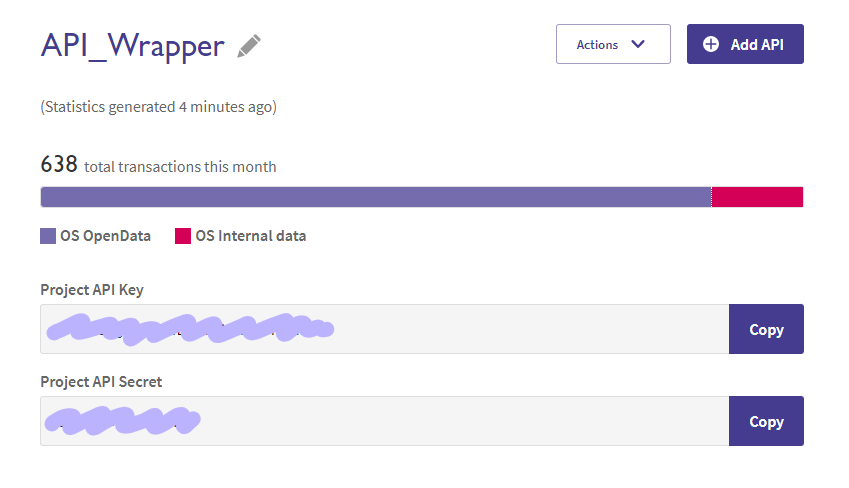

In [111]:
# Name of the feature type from the features API.
# Full list available here: https://osdatahub.os.uk/docs/wfs/technicalSpecification 
TYPE_NAME = "Highways_RoadLink"

# Extent to return results within - must be passed as a string
west, south, east, north = 441000, 110900, 442900, 112600
BBOX = f"{west}, {south}, {east}, {north}"

# The coordinate reference system you want for the returned data
SRS = 'EPSG:27700'

# The number of features to return. Caution: may mean you don't get everything in bbox
MAX_FEATURE_COUNT = 100000

# Safety feature to manage when you consume premium data
ALLOW_PREMIUM = True

In [91]:
import geopandas as gpd

# Call API
payload = wfs_api.get_all_features_within_bbox(type_name=TYPE_NAME,
                                               bbox=BBOX,
                                               srs=SRS,
                                               max_feature_count=MAX_FEATURE_COUNT,
                                               allow_premium=ALLOW_PREMIUM)

# payload is geojson - convert to geopandas geodataframe
roads = gpd.GeoDataFrame.from_features(payload["features"], crs=SRS)

In [244]:
roads

,geometry,OBJECTID,ID,Identifier,InspireIDNamespace,InspireIDLocalID,Fictitious,RoadClassification,RouteHierarchy,FormOfWay,...,ElevationGainInOppDir,FormsPartOf,StartNode,EndNode,RelatedRoadArea,BeginLifespanVersion,ValidForm,ReasonForChange,AlternateIdentifierScheme,SHAPE_Length
0,"LINESTRING (442745.000 111065.000, 442745.628 ...",6306,osgb4000000023362021,http://data.os.uk/id/4000000023362021,http://data.os.uk/,4000000023362021,false,B Road,B Road,Single Carriageway,...,0,"Road#osgb4000000023471689,Road#osgb40000000235...",osgb4000000023091553,osgb4000000023091550,"osgb1000000157094868,osgb1000000157095054,osgb...",4/15/2017,null,Modified Geometry And Attributes,NSG Elementary Street Unit ID (ESU ID),56.313089
1,"LINESTRING (442806.967 111217.535, 442819.273 ...",6307,osgb4000000023362085,http://data.os.uk/id/4000000023362085,http://data.os.uk/,4000000023362085,false,A Road,A Road,Traffic Island Link At Junction,...,0.1,"Road#osgb4000000023479143,Road#osgb40000000235...",osgb4000000023091718,osgb5000005134923419,"osgb1000002109309362,osgb5000005197551991",4/15/2017,null,Modified Geometry And Attributes,NSG Elementary Street Unit ID (ESU ID),39.702693
2,"LINESTRING (441488.000 112561.000, 441489.000 ...",6344,osgb4000000023363514,http://data.os.uk/id/4000000023363514,http://data.os.uk/,4000000023363514,false,Unclassified,Local Road,Single Carriageway,...,0,"Road#osgb4000000023471826,Street#usrn37011352",osgb4000000023096083,osgb4000000023096081,"osgb1000000157011903,osgb1000000157012004,osgb...",4/15/2017,null,Modified Geometry And Attributes,NSG Elementary Street Unit ID (ESU ID),54.762972
3,"LINESTRING (442438.000 112217.000, 442500.000 ...",6359,osgb4000000023364309,http://data.os.uk/id/4000000023364309,http://data.os.uk/,4000000023364309,false,A Road,A Road,Slip Road,...,0.4,"Road#osgb4000000023468191,Road#osgb40000000235...",osgb4000000023098349,osgb4000000023098350,"osgb1000000157120326,osgb1000000157120330",4/15/2017,null,Modified Geometry And Attributes,NSG Elementary Street Unit ID (ESU ID),62.968246
4,"LINESTRING (442510.000 112027.000, 442505.563 ...",6361,osgb4000000023364336,http://data.os.uk/id/4000000023364336,http://data.os.uk/,4000000023364336,false,Unclassified,Local Road,Single Carriageway,...,0.4,"Road#osgb4000000023492087,Street#usrn37011632",osgb4000000023098330,osgb4000000023098323,"osgb1000000157120035,osgb1000002039817117",4/15/2017,null,Modified Geometry And Attributes,NSG Elementary Street Unit ID (ESU ID),54.103873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,"LINESTRING (441167.022 112334.846, 441168.000 ...",5989510,osgb5000005201658598,http://data.os.uk/id/5000005201658598,http://data.os.uk/,5000005201658598,false,Unclassified,Local Road,Single Carriageway,...,0.1,"Road#osgb4000000023479450,Street#usrn37011325",osgb5000005201654044,osgb5000005201654049,osgb5000005201653904,8/20/2021,null,Modified Attributes,"NSG Elementary Street Unit ID (ESU ID),NSG Ele...",11.569975
1411,"LINESTRING (441174.000 112327.000, 441178.000 ...",5989511,osgb5000005201658610,http://data.os.uk/id/5000005201658610,http://data.os.uk/,5000005201658610,false,Unclassified,Local Road,Single Carriageway,...,0,"Road#osgb4000000023479450,Street#usrn37011325",osgb5000005201654049,osgb4000000023095970,"osgb5000005201653653,osgb5000005201653904",8/19/2021,null,Modified Attributes,NSG Elementary Street Unit ID (ESU ID),26.135944
1412,"LINESTRING (441174.000 112327.000, 441172.966 ...",5989512,osgb5000005201658612,http://data.os.uk/id/5000005201658612,http://data.os.uk/,5000005201658612,false,Unclassified,Restricted Local Access Road,Single Carriageway,...,0,Street#usrn37011325,osgb5000005201654049,osgb5000005201654054,"osgb5000005201653192,osgb5000005201653755,osgb...",8/19/2021,null,Modified Attributes,NSG Elementary Street Unit ID (ESU ID),31.021854
1413,"LINESTRING (442398.629 111174.323, 442385.559 ...",5991353,osgb5000005207344604,http://data.os.uk/id/5000005207344604,http://da

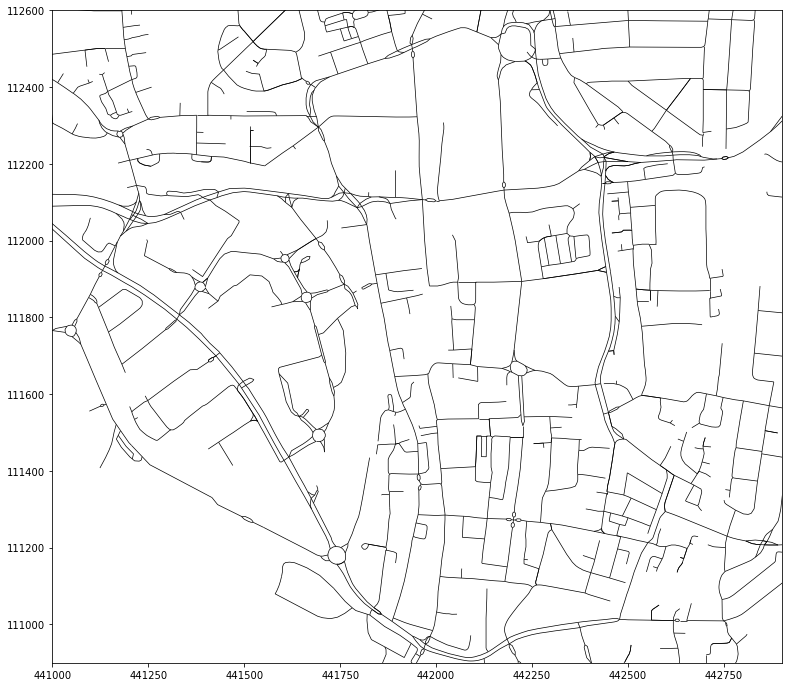

In [114]:
# Figure config
figsize=(20, 12)
xlim = (west, east)
ylim = (south, north)

# Plot roads
ax = roads.plot(color="k", linewidth=0.7, figsize=figsize)
ax.set(aspect="equal", xlim=xlim, ylim=ylim)
plt.show()

## Converting geospatial data to a graph

Use [momepy](docs.momepy.org/en/stable/index.html) to make conversion easy.

In [163]:
import momepy as mm

graph = mm.gdf_to_nx(roads, multigraph=False)
# Now have pre-built networkx graph
graph

In [164]:
# Graph nodes are coordinates where roads meet
list(graph.nodes())[0:10]

[(442745.0, 111065.0),
 (442748.649, 111009.252),
 (442806.967, 111217.535),
 (442845.0, 111208.0),
 (441488.0, 112561.0),
 (441523.0, 112519.0),
 (442438.0, 112217.0),
 (442500.0, 112206.0),
 (442510.0, 112027.0),
 (442458.003, 112020.13)]

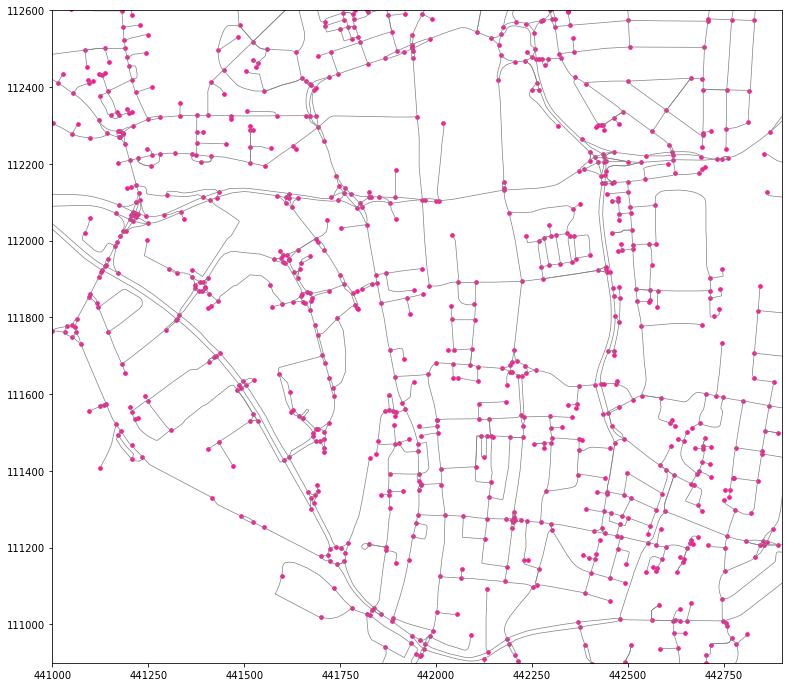

In [165]:
import matplotlib.pyplot as plt

# Plot the nodes
ax = roads.plot(color="grey", linewidth=0.7, figsize=figsize)
x, y = zip(*graph.nodes())
ax.scatter(x, y, color="deeppink", s=13)
ax.set(aspect="equal", xlim=xlim, ylim=ylim)
plt.show()

In [166]:
# Graph edges are defined by the two nodes they connect.
# Here those nodes represent the coordinates of the start and end of that section of road
list(graph.edges())[0:10]

[((442745.0, 111065.0), (442748.649, 111009.252)),
 ((442745.0, 111065.0), (442752.815, 111138.044)),
 ((442745.0, 111065.0), (442971.0, 111162.0)),
 ((442748.649, 111009.252), (442755.287, 111004.358)),
 ((442748.649, 111009.252), (442653.0, 111010.0)),
 ((442748.649, 111009.252), (442930.0, 111130.0)),
 ((442806.967, 111217.535), (442845.0, 111208.0)),
 ((442806.967, 111217.535), (442758.0, 111230.0)),
 ((442806.967, 111217.535), (442850.958, 111218.208)),
 ((442845.0, 111208.0), (442850.958, 111218.208))]

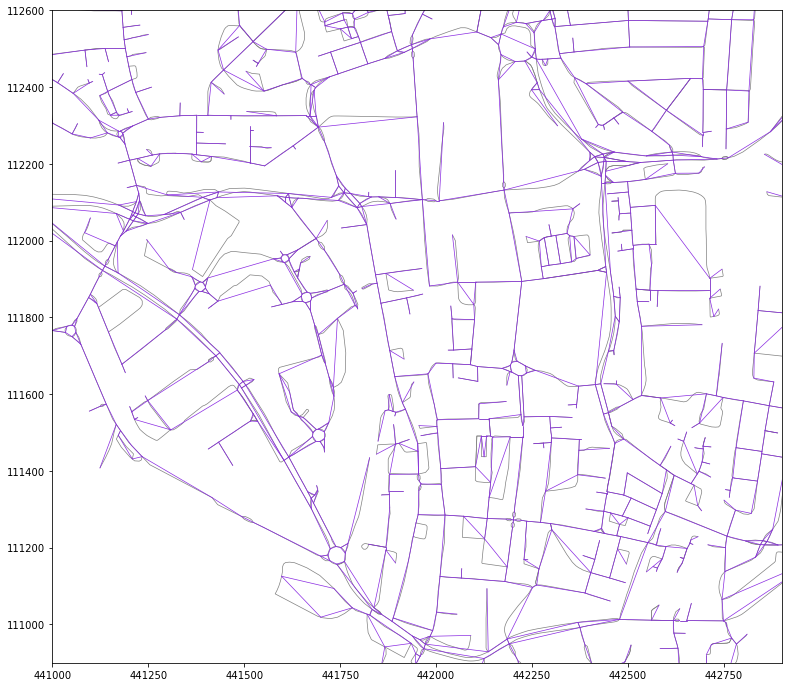

In [167]:
# Plot the edges. Edges denote links between nodes so don't follow real-world path
ax = roads.plot(color="grey", figsize=figsize, linewidth=0.7)
for edge in graph.edges():
    x, y = zip(*edge)
    ax.plot(x, y, color="blueviolet", linewidth=0.7)
ax.set(xlim=xlim, ylim=ylim)
plt.show()

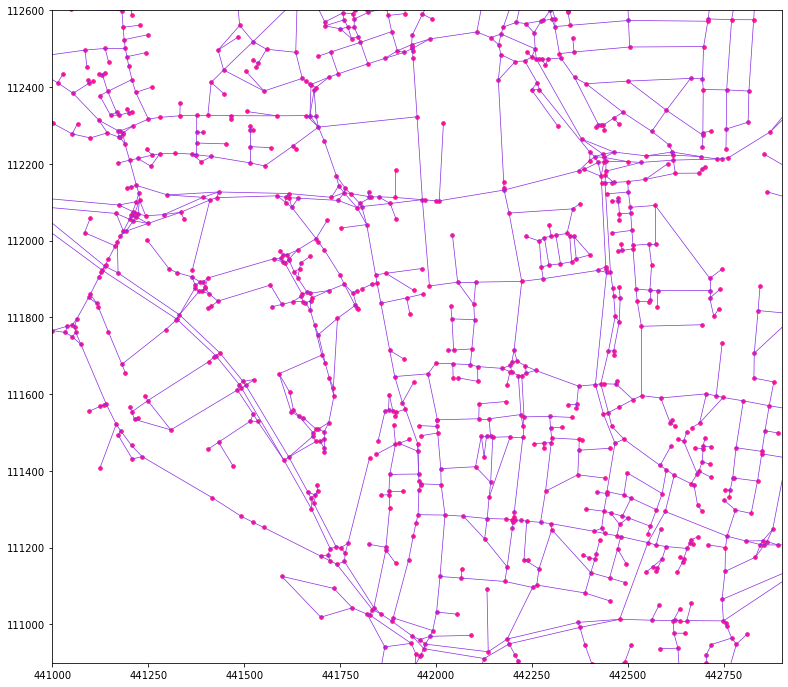

In [168]:
# Bring edges and nodes together to get plot of graph representation
fig, ax = plt.subplots(figsize=figsize)
x, y = zip(*graph.nodes())
ax.scatter(x, y, color="deeppink", s=13)
for edge in graph.edges():
    x, y = zip(*edge)
    ax.plot(x, y, color="blueviolet", linewidth=0.7)
ax.set(aspect="equal", xlim=xlim, ylim=ylim)
plt.show()

In [169]:
# Nodes and edges can have data associated with them.
# Momepy has attributed the information from MasterMap that was in the dataframe to the corresponding edge in the graph
# Graph geometry looks simplifed in previous graph but is retained in full as shapely object in the edge data
list(graph.edges(data=True))[0]

((442745.0, 111065.0),
 (442748.649, 111009.252),
 {'geometry': <shapely.geometry.linestring.LineString at 0x1d39714fd90>,
  'OBJECTID': 6306,
  'ID': 'osgb4000000023362021',
  'Identifier': 'http://data.os.uk/id/4000000023362021',
  'InspireIDNamespace': 'http://data.os.uk/',
  'InspireIDLocalID': '4000000023362021',
  'Fictitious': 'false',
  'RoadClassification': 'B Road',
  'RouteHierarchy': 'B Road',
  'FormOfWay': 'Single Carriageway',
  'TrunkRoad': 'false',
  'PrimaryRoute': 'false',
  'RoadClassificationNumber': 'B3039',
  'RoadName1': 'Royal Crescent Road',
  'RoadName1Lang': 'null',
  'RoadName2': 'null',
  'RoadName2Lang': 'null',
  'AlternateName1': 'null',
  'AlternateName1Lang': 'null',
  'AlternateName2': 'null',
  'AlternateName2Lang': 'null',
  'OperationalState': 'Open',
  'Provenance': 'OS Urban And OS Height',
  'Directionality': 'bothDirections',
  'Length': '56.31',
  'LengthUOM': 'm',
  'MatchStatus': 'Matched',
  'AlternateIdentifier': '1780_44274501110370',
  

## Applying graph algorithms

shortest path
places within X travel distance


In [236]:
import networkx as nx

# Betweenness centrality of an edge is the sum of the fraction of all-pairs shortest paths that pass through it
# Tells us how important an edge is for movement around the graph
ebc = nx.edge_betweenness_centrality(graph)

In [239]:
# Add betweenness metric to the data stored for each edge
nx.set_edge_attributes(graph, ebc, "betweenness")

# Look at example edge to see betweenness now added to edge data
graph.edges[(442745.0, 111065.0), (442748.649, 111009.252)]

{'geometry': <shapely.geometry.linestring.LineString at 0x1d39714fd90>,
 'OBJECTID': 6306,
 'ID': 'osgb4000000023362021',
 'Identifier': 'http://data.os.uk/id/4000000023362021',
 'InspireIDNamespace': 'http://data.os.uk/',
 'InspireIDLocalID': '4000000023362021',
 'Fictitious': 'false',
 'RoadClassification': 'B Road',
 'RouteHierarchy': 'B Road',
 'FormOfWay': 'Single Carriageway',
 'TrunkRoad': 'false',
 'PrimaryRoute': 'false',
 'RoadClassificationNumber': 'B3039',
 'RoadName1': 'Royal Crescent Road',
 'RoadName1Lang': 'null',
 'RoadName2': 'null',
 'RoadName2Lang': 'null',
 'AlternateName1': 'null',
 'AlternateName1Lang': 'null',
 'AlternateName2': 'null',
 'AlternateName2Lang': 'null',
 'OperationalState': 'Open',
 'Provenance': 'OS Urban And OS Height',
 'Directionality': 'bothDirections',
 'Length': '56.31',
 'LengthUOM': 'm',
 'MatchStatus': 'Matched',
 'AlternateIdentifier': '1780_44274501110370',
 'StartGradeSeparation': 0,
 'EndGradeSeparation': 0,
 'RoadStructure': 'null',


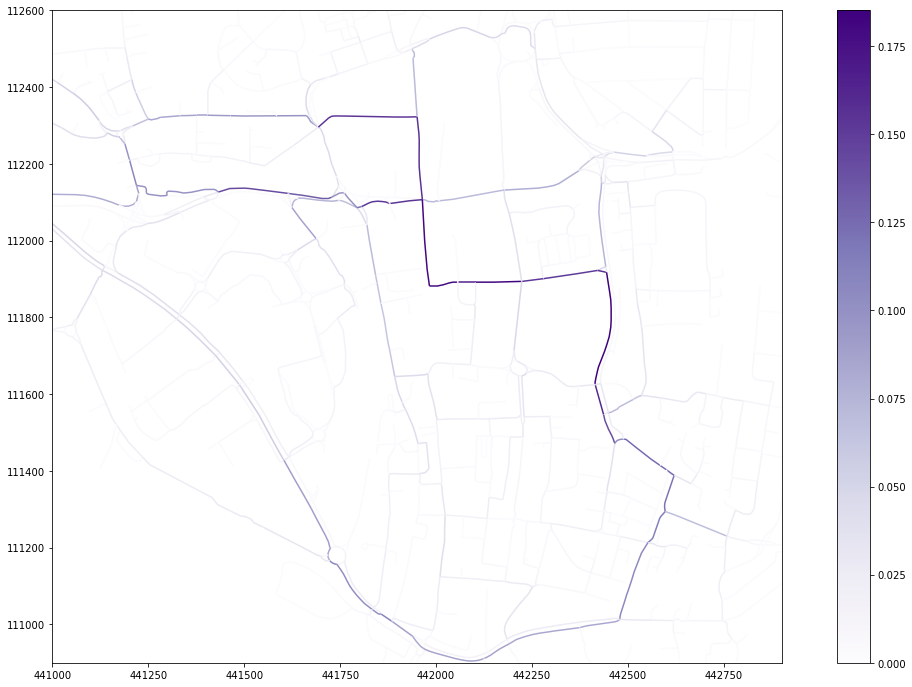

In [238]:
# Export graph back to gdf
edges_gdf = mm.nx_to_gdf(graph, lines=True, points=False)

# Plot newly added metric - edges now show their real-world path
ax = edges_gdf.plot("betweenness", figsize=figsize, cmap="Purples", legend=True)
ax.set(aspect="equal", xlim=xlim, ylim=ylim)
plt.show()

In [241]:
# Use Dijkstra's shortest path algorithm to find out travel distance from every node on the network to a destination
# Uses the "SHAPE_length" attribute of each edge to determine total weight for the possible routes.
destination = (441708.843, 111449.124) # The Quays Sports Complex
path_length = nx.single_source_dijkstra_path_length(graph, weight="SHAPE_Length", source=destination)
nx.set_node_attributes(graph, path_length, "path_length")

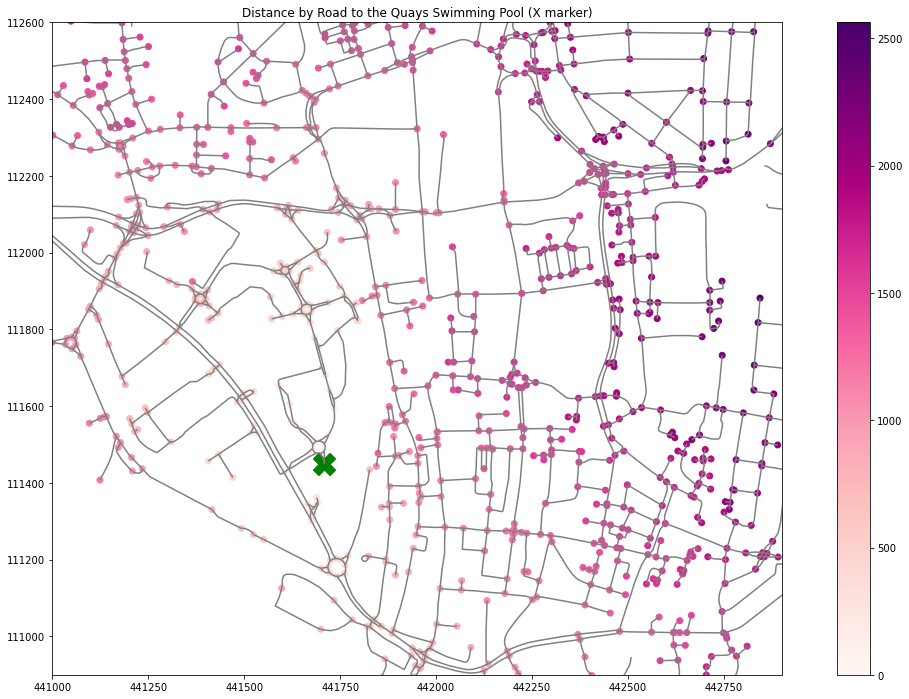

In [242]:
# Convert nodes to gdf
nodes_gdf = mm.nx_to_gdf(graph, lines=False, points=True)

# Plot nodes with newly added path_length attribute
ax = edges_gdf.plot(figsize=figsize, color="grey")
nodes_gdf.plot("path_length", figsize=figsize, cmap="RdPu", legend=True, ax=ax)
ax.scatter(*destination, s=500, color="g", marker="X")
ax.set(aspect="equal", xlim=xlim, ylim=ylim)
ax.set_title("Distance by Road to the Quays Sports Complex (X marker)")
plt.show()

NB these examples do not take into account one way streets - you can use OSMM attribute "Directionality" to construct a directed graph if needed, but thats beyond the scope of this workshop.

## Example of using graphs in practise
Autocordon
Calls API, converts roads to graph, uses betweenness centrality to work out how to isolate cordon, returns coordinates of nodes (i.e. junctions) to be closed.

## Augmenting the graph with other data
egs (don't actually do) of linking other data, like buildings, to the network.